##데이터 불러오기

### 데이터 전처리 후

In [ ]:
import pandas as pd
import numpy as np
import re
import json

In [ ]:
path = "/content/drive/MyDrive/pre_onboarding/Text_summarization/sports_news_data.csv"
data = pd.read_csv(path)
data = data[["TITLE","CONTENT"]]
data= data.dropna(axis=0)
data = data.drop_duplicates(["CONTENT"], keep='first').reset_index(drop=True)

data.loc[209]

TITLE              [오피셜] 서울 이랜드 FC, 울산 김인성 영입... “동기부여 필요했다”
CONTENT    [스포탈코리아] 이적시장 마지막 날, 서울 이랜드 FC는 오랜 기다림 속에 스피드 ...
Name: 209, dtype: object

In [ ]:
# 000 기자, 통신원 부분 삭제 
data_li = []

for text in  data['CONTENT']:
  if '기자 =' in text:
     text = text.split("기자 =")[1]
     data_li.append(text)

  elif '기자=' in text:  
     text = text.split("기자=")[1]
     data_li.append(text)

  elif '통신원=' in text:  
     text = text.split("통신원=")[1]
     data_li.append(text)
  else: 
     data_li.append(text)

data['CONTENT']=data_li  

In [ ]:
# 전처리 함수
import re

def preprocess_sentence(sentence):
    sentence = re.sub("(<([^>]+)>)", '', sentence) # <p>같은 <> 제거
    sentence = re.sub("\[.*\]", '', sentence) # []안에 있는것 제거
    sentence = re.sub("\n|\t|\r", '', sentence) # 공백 제거
    sentence = re.sub("\↓", '하락', sentence) # 기호 한글로 대체
    sentence = re.sub("\↑", '상승', sentence) 
    sentence = re.sub("\→", '에서', sentence) 
    sentence = re.sub("美", '미국', sentence) # 한자 한글로 대체
    sentence = re.sub("韓", '한국', sentence) 
    sentence = re.sub("日", '일본', sentence) 
    sentence = re.sub("中", '중국', sentence) 
    sentence = re.sub("英", '영국', sentence) 
    sentence = re.sub("주요 뉴스", '', sentence) # 주요뉴스 단어 제거
    sentence = re.sub('(\d{2}).(\d{2}).(\d{2})', r'\1-\2-\3', sentence) # 11.02.02 -> 11-02-02 로 형태 변경
    sentence = re.sub('(\d)[.](\d)', r'\1온점\2',sentence) # 8.5 -> 8온점5 형태로 변경. 후에 split후 다시 변경예정
    return sentence

In [ ]:
data['CONTENT']= data['CONTENT'].apply(preprocess_sentence)
data['CONTENT'] = data["CONTENT"].str.split("사진=").str[0] # 사진 제거
data['TITLE']= data['TITLE'].apply(preprocess_sentence)

data = data.replace('[^A-Za-z0-9가-힣.()"-:]+', ' ', regex=True) # 한글,영어, 숫자, 일부 특수문제 제외 제거

In [ ]:
# 문장으로 split 후 리스트로 변경 
content_split = data['CONTENT'].str.split(".").values.tolist()

# split 하느라 생긴 맨뒤 nan 제거 
content_split = [s[:-1] for s in content_split]

content = []
zero_index = []
index = []
drop_li= []
full_content = []
lead = []

for idx,line in enumerate(content_split):
    text = []

    for s in line:
        s = re.sub('(\d)온점(\d)', r'\1.\2', s)
        text.append(s.strip())
    full_content.append(text)
    lead.append(text[:3])
    if len(text) > 7:
        content.append(text)
        index.append(idx)
    elif len(line) == 0 :
        zero_index.append(idx)
    else:
         drop_li.append(idx)

#  len(text) < 7 인 문장 제거
# data= data.drop(drop_li, axis = 0)

# content 문장단위 list로 저장
# data['CONTENTS'] = content

In [ ]:
data['FULL_CONTENTS'] = full_content
data['LABEL'] = lead

In [ ]:
data['LABEL'][451] = ["소대현(울산 사무국장) 씨 빙모상"]
data['FULL_CONTENTS'][451] = ["소대현(울산 사무국장) 씨 빙모상"]
data['LABEL'][920] = ["이영호(연합뉴스 스포츠부 차장)씨 부친상"]
data['FULL_CONTENTS'][920] = ["이영호(연합뉴스 스포츠부 차장)씨 부친상"]
data['LABEL'][4522] = ["한국프로축구연맹(총재 권오갑)이 전주시설관리공단(이사장 구대식)에 감사패를 전달했다."]
data['FULL_CONTENTS'][4522] = ["한국프로축구연맹(총재 권오갑)이 전주시설관리공단(이사장 구대식)에 감사패를 전달했다."]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
#길이 확인
data['len_title'] =  data['TITLE'].apply(lambda x: len(x))
data['len_content'] =  data['CONTENT'].apply(lambda x: len(x))
data['len_full'] =  data['FULL_CONTENTS'].apply(lambda x: len(x))

In [ ]:
#평균 길이
print(data['len_title'].mean())
print(data['len_content'].mean())
print(data['len_full'].mean())

34.43314917127072
866.1755801104972
19.19790055248619


In [ ]:
# 최대,최소 길이
print('title :',data['len_title'].max(),',',data['len_title'].min())
print('content :',data['len_content'].max(),',', data['len_content'].min())
print('full_contents :',data['len_full'].max(),',',data['len_full'].min())

title : 57 , 14
content : 15522 , 5
full_contents : 251 , 1


In [ ]:
data[data['len_full']==251]

,TITLE,CONTENT,FULL_CONTENTS,LABEL,len_title,len_content,len_full,title_count,content_count,label_count,token_title,token_content,noun_title,noun_content,title_noun_ratio,content_noun_ratio,token_label,noun_label,label_noun_ratio
6028,"벤투호 분위기에 취한 황인범 ""꿈 같은 시간, 당연해지면 안 돼""",황인범과 전화 인터뷰를 하기로 약속한 시간까지 두 시간이 남은 이른 토요일 아침....,"[황인범과 전화 인터뷰를 하기로 약속한 시간까지 두 시간이 남은 이른 토요일 아침,...","황인범과 전화 인터뷰를 하기로 약속한 시간까지 두 시간이 남은 이른 토요일 아침,그...",36,15522,251,10,3831,40,22,8155,6,2356,0.272727,0.288903,79,38,0.481013


In [ ]:
#본문 문장 길이가 0인 경우 대체
data[data['len_full']==0]

,TITLE,CONTENT,FULL_CONTENTS,LABEL,len_title,len_content,len_full,title_count,content_count,label_count


In [ ]:
#어절 개수
data['title_count'] = data['TITLE'].str.split(' ')
data['content_count'] = data['CONTENT'].str.split(' ')
data['label_count'] = data['LABEL'].str.split(' ')
data['title_count']  =  data['title_count'].apply(lambda x: len(x))
data['content_count'] =  data['content_count'].apply(lambda x: len(x))
data['label_count'] = data['label_count'].apply(lambda x: len(x))

In [ ]:
#평균 어절 개수
print(data['title_count'].mean())
print(data['content_count'].mean())
print(data['label_count'].mean())

9.400773480662984
197.9636464088398
32.36917127071823


In [ ]:
!pip install konlpy 

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()

In [ ]:
#품사 처리
def komoran_tokenizer(sent):
    words = komoran.pos(sent, join=True)
    #words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

def komoran_noun(sent):
    words = komoran.nouns(sent)
    return words

In [ ]:
data['LABEL'] = data['LABEL'].apply(lambda x: ",".join(x))

In [ ]:
data['token_title'] = data['TITLE'].apply(komoran_tokenizer)
data['token_content'] = data['CONTENT'].apply(komoran_tokenizer)
data['token_label'] = data['LABEL'].apply(komoran_tokenizer)

In [ ]:
data['noun_title'] = data['TITLE'].apply(komoran_noun)
data['noun_content'] = data['CONTENT'].apply(komoran_noun)
data['noun_label'] = data['LABEL'].apply(komoran_noun)

In [ ]:
data['token_title'] = data['token_title'].apply(lambda x: len(x))
data['token_content'] = data['token_content'].apply(lambda x: len(x))
data['token_label'] = data['token_label'].apply(lambda x: len(x))
data['noun_title'] = data['noun_title'].apply(lambda x: len(x))
data['noun_content'] = data['noun_content'].apply(lambda x: len(x))
data['noun_label'] = data['noun_label'].apply(lambda x: len(x))

In [ ]:
data['title_noun_ratio']  =  data['noun_title']/data['token_title'] 
data['content_noun_ratio'] =  data['noun_content']/data['token_content']
data['label_noun_ratio'] =  data['noun_label']/data['token_label']

In [ ]:
#전체 타이틀, 본문 평균 명사 사용률
print(data['title_noun_ratio'].mean())
print(data['content_noun_ratio'].mean())
print(data['label_noun_ratio'].mean())

0.48577895089458323
0.34339328612234205
0.3943054029724862


In [ ]:
data

,TITLE,CONTENT,FULL_CONTENTS,LABEL,len_title,len_content,len_full,title_count,content_count,label_count,token_title,token_content,noun_title,noun_content,title_noun_ratio,content_noun_ratio,token_label,noun_label,label_noun_ratio
0,스털링 다이빙 논란 종결 오른쪽 다리 접촉 있었잖아,유럽축구연맹(UEFA) 유로 2020 심판위원장 로베르토 로세티가 잉글랜드와 덴마...,[유럽축구연맹(UEFA) 유로 2020 심판위원장 로베르토 로세티가 잉글랜드와 덴마...,유럽축구연맹(UEFA) 유로 2020 심판위원장 로베르토 로세티가 잉글랜드와 덴마크...,29,809,18,9,188,30,10,409,7,150,0.700000,0.366748,68,31,0.455882
1,"디 마리아 없다 유로X코파 베스트11, 이탈리아만 7명",유로 2020과 코파 아메리카 2021로 베스트11을 만든다면 어떤 모습일까.지난...,"[유로 2020과 코파 아메리카 2021로 베스트11을 만든다면 어떤 모습일까, 지...","유로 2020과 코파 아메리카 2021로 베스트11을 만든다면 어떤 모습일까,지난달...",31,714,17,8,150,28,15,337,9,131,0.600000,0.388724,60,23,0.383333
2,슈퍼컴퓨터 예측 맨시티 우승-맨유 4위 토트넘은 6위,새 시즌이 시작하기도 전에 슈퍼컴퓨터가 예상한 순위가 나왔다.영국 매체 스포츠 바...,"[새 시즌이 시작하기도 전에 슈퍼컴퓨터가 예상한 순위가 나왔다, 영국 매체 스포츠 ...","새 시즌이 시작하기도 전에 슈퍼컴퓨터가 예상한 순위가 나왔다,영국 매체 스포츠 바이...",31,646,16,9,138,23,14,338,8,110,0.571429,0.325444,60,25,0.416667
3,"이재성, 완벽한 프로 마인츠서 성공할 것 킬 디렉터의 애정 듬뿍 응원",홀슈타인 킬 우베 스토버 디렉터가 이재성을 향해 응원 메시지를 띄웠다.이재성은 2...,"[홀슈타인 킬 우베 스토버 디렉터가 이재성을 향해 응원 메시지를 띄웠다, 이재성은 ...","홀슈타인 킬 우베 스토버 디렉터가 이재성을 향해 응원 메시지를 띄웠다,이재성은 20...",39,834,26,12,191,21,19,444,9,130,0.473684,0.292793,47,17,0.361702
4,"홈킷과 딴판 바르사 팬들, NEW 어웨이 셔츠 호평 가장 좋아하는 색",FC 바르셀로나가 새 시즌 원정 유니폼을 공개했다. 팬들은 만족스럽다는 반응이다....,"[FC 바르셀로나가 새 시즌 원정 유니폼을 공개했다, 팬들은 만족스럽다는 반응이다,...","FC 바르셀로나가 새 시즌 원정 유니폼을 공개했다,팬들은 만족스럽다는 반응이다,바르...",40,532,16,13,124,19,16,279,7,84,0.437500,0.301075,49,19,0.387755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,"이제 홈팬 야유 받는 먹튀 선수, 차비 감독 조차 그만 해라",FC바르셀로나(이하 바르사) 팬들에게 우스망 뎀벨레는 밉상이 되어버렸다. 바르사는...,"[FC바르셀로나(이하 바르사) 팬들에게 우스망 뎀벨레는 밉상이 되어버렸다, 바르사는...","FC바르셀로나(이하 바르사) 팬들에게 우스망 뎀벨레는 밉상이 되어버렸다,바르사는 7...",34,475,13,12,107,29,16,265,8,78,0.500000,0.294340,79,28,0.354430
9046,"성남, 만 17세 유스 김지수와 준프로 계약",성남FC가 만17세 2004년생 수비수 김지수와 준프로 계약을 체결했다. 김지수는 ...,"[성남FC가 만17세 2004년생 수비수 김지수와 준프로 계약을 체결했다, 김지수는...","성남FC가 만17세 2004년생 수비수 김지수와 준프로 계약을 체결했다,김지수는 1...",26,811,14,9,188,32,12,404,6,157,0.500000,0.388614,82,29,0.353659
9047,"오베르마스, 아약스서 쫓겨난다...'여성 동료들에게 부적절한 메시지'",'레전드' 마르크 오베르마스가 아약스에서 쫓겨났다. 이유는 굉장히 굴욕적이었다.아...,"['레전드' 마르크 오베르마스가 아약스에서 쫓겨났다, 이유는 굉장히 굴욕적이었다, ...","'레전드' 마르크 오베르마스가 아약스에서 쫓겨났다,이유는 굉장히 굴욕적이었다,아약스...",38,737,21,6,167,17,19,391,5,114,0.263158,0.291560,49,17,0.346939
9048,"바르사 차비 감독, 트라오레 데뷔전 활약에 깜짝...""몸이 야수 같아""",FC 바르셀로나 차비 에르난데스 감독이 데뷔전을 치른 아다마 트라오레를 극찬했다....,"[FC 바르셀로나 차비 에르난데스 감독이 데뷔전을 치른 아다마 트라오레를 극찬했다,...","FC 바르셀로나 차비 에르난데스 감독이 데뷔전을 치른 아다마 트라오레를 극찬했다,바...",39,825,18,9,180,38,18,426,7,142,0.388889,0.333333,87,34,0.390805


### 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


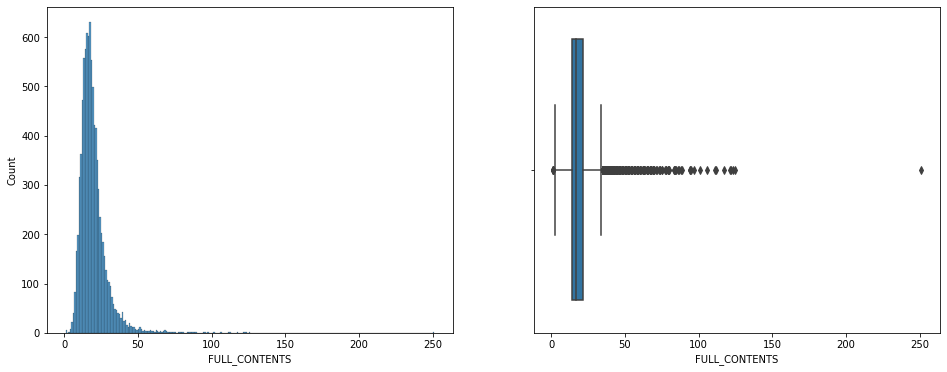

In [ ]:
#기사 본문 문장 수 sentence
original_sent_counts = data['FULL_CONTENTS'].apply(len)
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[3, 3]))
sns.histplot(original_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_sent_counts, ax=axs[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


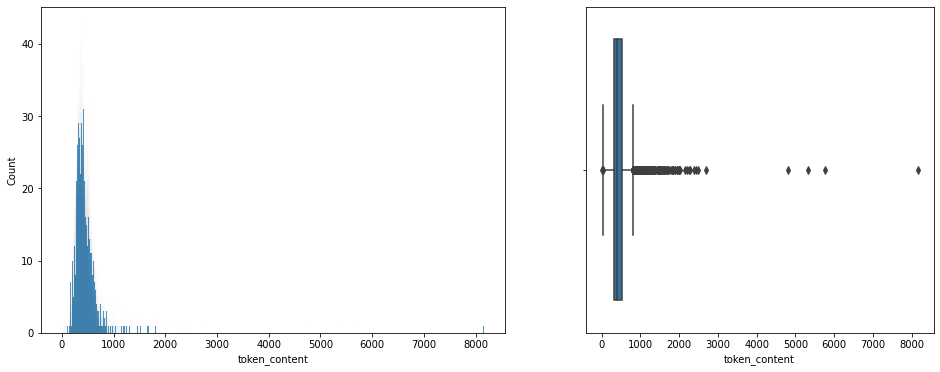

In [ ]:
# 기사 본문 word 수
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(data['token_content'], binwidth=1, ax=axs[0])
sns.boxplot(data['token_content'], ax=axs[1])

In [ ]:
path = "/content/drive/MyDrive/pre_onboarding/Text_summarization/data.csv"
data_sent = pd.read_csv(path)

In [ ]:
!pip install git+https://github.com/lovit/textrank.git

  Cloning https://github.com/lovit/textrank.git to /tmp/pip-req-build-vbdfom8g
  Running command git clone -q https://github.com/lovit/textrank.git /tmp/pip-req-build-vbdfom8g
  Created wheel for textrank: filename=textrank-0.1.2-py3-none-any.whl size=11171 sha256=96ff8c50e8c52f865e8dd38c2bc2cb191303f68649375420be64b2dc50a3745e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ef3uv97f/wheels/92/77/3d/d596fd63962c68b352c2e39170c2cbe21b9fca35e89aafdf87
Successfully built textrank


In [ ]:
# tokenizer

from textrank import KeysentenceSummarizer

def subword_tokenizer(sent, n=3):
    def subword(token, n):
        if len(token) <= n:
            return [token]
        return [token[i:i+n] for i in range(len(token) - n + 1)]
    return [sub for token in sent.split() for sub in subword(token, n)]

summarizer = KeysentenceSummarizer(
    tokenize = subword_tokenizer,
    min_sim = 0.3,
    verbose = True
)

In [ ]:
# 3개 문장 추출
summary = []
for idx, text in enumerate(content):
       keysents = summarizer.summarize(text, topk= 3)
       summary.append(keysents)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
calculating textrank sentence similarity was done with 21 sents
trained TextRank. n sentences = 21
calculating textrank sentence similarity was done with 16 sents
trained TextRank. n sentences = 16
calculating textrank sentence similarity was done with 15 sents
trained TextRank. n sentences = 15
calculating textrank sentence similarity was done with 16 sents
trained TextRank. n sentences = 16
calculating textrank sentence similarity was done with 23 sents
trained TextRank. n sentences = 23
calculating textrank sentence similarity was done with 25 sents
trained TextRank. n sentences = 25
calculating textrank sentence similarity was done with 16 sents
trained TextRank. n sentences = 16
calculating textrank sentence similarity was done with 14 sents
trained TextRank. n sentences = 14
calculating textrank sentence similarity was done with 18 sents
trained TextRank. n sentences = 18
calculating textrank sentence similarity was done with 17 sents
trained T

In [ ]:
ext = []
ext_summary= [] 

for n in range(len(content)):
    ext_dic = dict()
    idx = []
    score = []
    sum_list = []
    for i in range(3):
        idx.append(summary[n][i][0]) # idx
        #score.append(summary[n][i][1]) # score
        #sum_list.append(summary[n][i][2]) # summary
    ext_dic['idx'] = idx
    #ext_dic['score'] = score
    #ext_dic['summary'] = sum_list
    
    ext_summary.append(ext_dic['idx']) 
    ext.append(ext_dic)

# data['LABEL'] = ext_summary    

In [ ]:
ext[0]['idx']

[0, 9, 7]

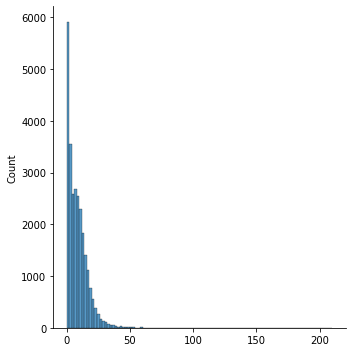

In [ ]:
# textrank index 분포
import collections

extractives = []
for idx in ext:
     extractives += idx['idx']

sns.displot(extractives, binwidth=2)  # , x="flipper_length_mm"
    
#collections.Counter(temp)